In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

We have imported all the required libraries for our data analysis

In [2]:
hs = pd.read_csv('happiness_score_dataset.csv')
hs

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


The dataset has been successfully loaded.

In [3]:
hs.keys()

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

It gives us the names/labels of all the columns.

In [4]:
hs.shape

(158, 12)

There are 158 rows and 12 columns in the dataset.

In [5]:
hs.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

It says that two columns "country" and "Region" has string data type ; "happiness rank" has integer datatype and rest all columns have float data type.

In [6]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

It gives the information about the total non_null value count in each row for each column alongwith it's datatype. It also gives us the information og total memory usage.

In [7]:
hs.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

It gives us the names of all the columns.

In [8]:
hs.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


It gives the statistical data of the dataset. On looking upon count , we can say that none column has a null value. The mean gives the mean of datas of each column. std gives the value of Stabdard deviation for each column. 

In [9]:
hs.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

There are no missing values in dataset.

# Finding Maximums and Minimums for Each Variable

In [10]:
hs.head(1)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738


The world's happiest country is Switzerland with a happiness score of 7.587

In [11]:
hs.tail(1)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


The world's Least Happy country is Togo with a happiness score of 2.839

In [12]:
gdp = hs["Economy (GDP per Capita)"]
gdp.idxmax()

27

The country with maximum GDP has a index value 27

In [13]:
hs.Country[27]

'Qatar'

The Country with maximum GDP is Qatar.

In [14]:
gdp.idxmin()

119

The Country with least GDP is at index number 119

In [15]:
mingdp=hs.loc[119]
mingdp

Country                            Congo (Kinshasa)
Region                           Sub-Saharan Africa
Happiness Rank                                  120
Happiness Score                               4.517
Standard Error                               0.0368
Economy (GDP per Capita)                        0.0
Family                                       1.0012
Health (Life Expectancy)                    0.09806
Freedom                                     0.22605
Trust (Government Corruption)               0.07625
Generosity                                  0.24834
Dystopia Residual                           2.86712
Name: 119, dtype: object

The country with least GDP is Congo(Kinshasa)

In [16]:
std = hs["Standard Error"]
std.idxmax()

64

The Country with least Standard Error Is at index 64

In [17]:
maxstd=hs.loc[64]
maxstd

Country                                              Jamaica
Region                           Latin America and Caribbean
Happiness Rank                                            65
Happiness Score                                        5.709
Standard Error                                       0.13693
Economy (GDP per Capita)                             0.81038
Family                                               1.15102
Health (Life Expectancy)                             0.68741
Freedom                                              0.50442
Trust (Government Corruption)                        0.02299
Generosity                                            0.2123
Dystopia Residual                                    2.32038
Name: 64, dtype: object

The Country with maximum Standard Error is Jamaica.

In [18]:
std.idxmin()

25

The country with least standard error has a index value of 25

In [19]:
minstd = hs.loc[25]
minstd

Country                                 Germany
Region                           Western Europe
Happiness Rank                               26
Happiness Score                            6.75
Standard Error                          0.01848
Economy (GDP per Capita)                1.32792
Family                                  1.29937
Health (Life Expectancy)                0.89186
Freedom                                 0.61477
Trust (Government Corruption)           0.21843
Generosity                              0.28214
Dystopia Residual                       2.11569
Name: 25, dtype: object

The country with minimum Standard error is Germany.

In [20]:
fam = hs["Family"]
fam.idxmax()

1

The country with maximum Faamily support has an index value of 1

In [21]:
maxfam=hs.loc[1]
maxfam

Country                                 Iceland
Region                           Western Europe
Happiness Rank                                2
Happiness Score                           7.561
Standard Error                          0.04884
Economy (GDP per Capita)                1.30232
Family                                  1.40223
Health (Life Expectancy)                0.94784
Freedom                                 0.62877
Trust (Government Corruption)           0.14145
Generosity                               0.4363
Dystopia Residual                       2.70201
Name: 1, dtype: object

The country with maximum family support is Iceland.

In [22]:
fam.idxmin()

147

The country with least Family Support is at index 147

In [23]:
minfam=hs.loc[147]
minfam

Country                          Central African Republic
Region                                 Sub-Saharan Africa
Happiness Rank                                        148
Happiness Score                                     3.678
Standard Error                                    0.06112
Economy (GDP per Capita)                           0.0785
Family                                                0.0
Health (Life Expectancy)                          0.06699
Freedom                                           0.48879
Trust (Government Corruption)                     0.08289
Generosity                                        0.23835
Dystopia Residual                                  2.7223
Name: 147, dtype: object

The country with minimum Family support is Cenyral African Republic 

In [24]:
hlt=hs["Health (Life Expectancy)"]
hlt.idxmax()

23

The country with good health is at index 23

In [25]:
maxhlt=hs.loc[23]
maxhlt

Country                                  Singapore
Region                           Southeastern Asia
Happiness Rank                                  24
Happiness Score                              6.798
Standard Error                              0.0378
Economy (GDP per Capita)                   1.52186
Family                                        1.02
Health (Life Expectancy)                   1.02525
Freedom                                    0.54252
Trust (Government Corruption)               0.4921
Generosity                                 0.31105
Dystopia Residual                          1.88501
Name: 23, dtype: object

The country with maximum good health is Singapore. Means it has the maximum life expectancy.

In [26]:
hlt.idxmin()

122

The country with poor health is at index 122

In [27]:
minhlt=hs.loc[122]
minhlt

Country                                Sierra Leone
Region                           Sub-Saharan Africa
Happiness Rank                                  123
Happiness Score                               4.507
Standard Error                              0.07068
Economy (GDP per Capita)                    0.33024
Family                                      0.95571
Health (Life Expectancy)                        0.0
Freedom                                      0.4084
Trust (Government Corruption)               0.08786
Generosity                                  0.21488
Dystopia Residual                           2.51009
Name: 122, dtype: object

The country with least life expectancy / poorest health is Sierra Leone.

In [28]:
free=hs["Freedom"]
free.idxmax()

3

The country with maximum freedom is at index 3

In [29]:
maxfree=hs.loc[3]
maxfree

Country                                  Norway
Region                           Western Europe
Happiness Rank                                4
Happiness Score                           7.522
Standard Error                           0.0388
Economy (GDP per Capita)                  1.459
Family                                  1.33095
Health (Life Expectancy)                0.88521
Freedom                                 0.66973
Trust (Government Corruption)           0.36503
Generosity                              0.34699
Dystopia Residual                       2.46531
Name: 3, dtype: object

The country with maximum freedom is Norway

In [30]:
free.idxmin()

111

The country with least freedom is at index 111

In [31]:
minfree=hs.loc[111]
minfree

Country                                                     Iraq
Region                           Middle East and Northern Africa
Happiness Rank                                               112
Happiness Score                                            4.677
Standard Error                                           0.05232
Economy (GDP per Capita)                                 0.98549
Family                                                   0.81889
Health (Life Expectancy)                                 0.60237
Freedom                                                      0.0
Trust (Government Corruption)                            0.13788
Generosity                                               0.17922
Dystopia Residual                                        1.95335
Name: 111, dtype: object

The country with minimum freedom is Iraq

In [32]:
trust = hs['Trust (Government Corruption)']
trust.idxmax()

153

The country with maximum Trust on Government is at index 153

In [33]:
maxtrust=hs.loc[153]
maxtrust

Country                                      Rwanda
Region                           Sub-Saharan Africa
Happiness Rank                                  154
Happiness Score                               3.465
Standard Error                              0.03464
Economy (GDP per Capita)                    0.22208
Family                                       0.7737
Health (Life Expectancy)                    0.42864
Freedom                                     0.59201
Trust (Government Corruption)               0.55191
Generosity                                  0.22628
Dystopia Residual                           0.67042
Name: 153, dtype: object

The country with maximum trust on government is Rwanda

In [34]:
trust.idxmin()

73

The country with minimum trust on government is at index 73

In [35]:
mintrust=hs.loc[73]
mintrust

Country                                  Indonesia
Region                           Southeastern Asia
Happiness Rank                                  74
Happiness Score                              5.399
Standard Error                             0.02596
Economy (GDP per Capita)                   0.82827
Family                                     1.08708
Health (Life Expectancy)                   0.63793
Freedom                                    0.46611
Trust (Government Corruption)                  0.0
Generosity                                 0.51535
Dystopia Residual                          1.86399
Name: 73, dtype: object

The country with minimum trust on government is Indonesia

In [36]:
gen = hs['Generosity']
gen.idxmax()

128

The country with Highest Generosity is at index 128 

In [37]:
maxgen=hs.loc[128]
maxgen

Country                                    Myanmar
Region                           Southeastern Asia
Happiness Rank                                 129
Happiness Score                              4.307
Standard Error                             0.04351
Economy (GDP per Capita)                   0.27108
Family                                     0.70905
Health (Life Expectancy)                   0.48246
Freedom                                    0.44017
Trust (Government Corruption)              0.19034
Generosity                                 0.79588
Dystopia Residual                          1.41805
Name: 128, dtype: object

The country with highest generosity is Myanmar

In [38]:
gen.idxmin()

101

The country with lowest Generosity is at index 101

In [39]:
mingen=hs.loc[101]
mingen

Country                                  Greece
Region                           Western Europe
Happiness Rank                              102
Happiness Score                           4.857
Standard Error                          0.05062
Economy (GDP per Capita)                1.15406
Family                                  0.92933
Health (Life Expectancy)                0.88213
Freedom                                 0.07699
Trust (Government Corruption)           0.01397
Generosity                                  0.0
Dystopia Residual                       1.80101
Name: 101, dtype: object

The country with lowest Generosit is Greece

In [40]:
dys=hs['Dystopia Residual']
dys.idxmax()

13

The country with highest Dystopia residual is at index 13

In [41]:
maxdys=hs.loc[13]
maxdys

Country                                               Mexico
Region                           Latin America and Caribbean
Happiness Rank                                            14
Happiness Score                                        7.187
Standard Error                                       0.04176
Economy (GDP per Capita)                             1.02054
Family                                               0.91451
Health (Life Expectancy)                             0.81444
Freedom                                              0.48181
Trust (Government Corruption)                        0.21312
Generosity                                           0.14074
Dystopia Residual                                    3.60214
Name: 13, dtype: object

The country with highest Dystopia Residual is Mexico

In [42]:
dys.idxmin()

155

The country with minimum dystopia residual is at index 155

In [43]:
mindys=hs.loc[155]
mindys

Country                                                    Syria
Region                           Middle East and Northern Africa
Happiness Rank                                               156
Happiness Score                                            3.006
Standard Error                                           0.05015
Economy (GDP per Capita)                                  0.6632
Family                                                   0.47489
Health (Life Expectancy)                                 0.72193
Freedom                                                  0.15684
Trust (Government Corruption)                            0.18906
Generosity                                               0.47179
Dystopia Residual                                        0.32858
Name: 155, dtype: object

The country with lowest dystopia residual is Syria.

# Visualization

<AxesSubplot:>

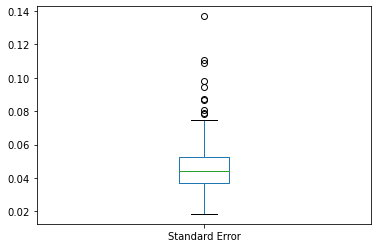

In [44]:
hs['Standard Error'].plot.box()

There are many outliers present in STandard error

<AxesSubplot:>

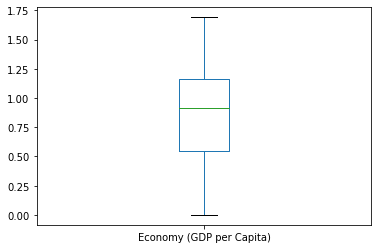

In [45]:
hs['Economy (GDP per Capita)'].plot.box()

There are no outliers in Economy

<AxesSubplot:>

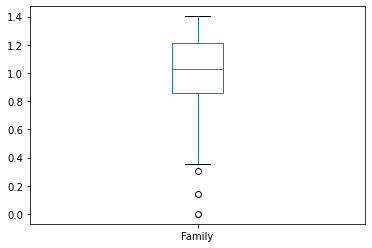

In [46]:
hs['Family'].plot.box()

There are few outliers in Family

<AxesSubplot:>

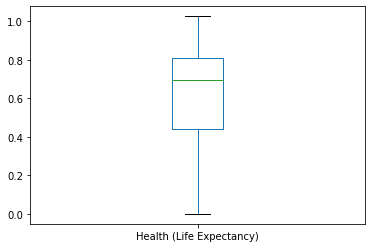

In [47]:
hs['Health (Life Expectancy)'].plot.box()

There are no outliers in Health

<AxesSubplot:>

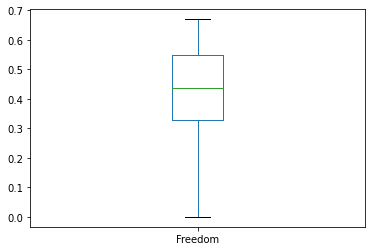

In [48]:
hs['Freedom'].plot.box()

There are no outliers in Freedom

<AxesSubplot:>

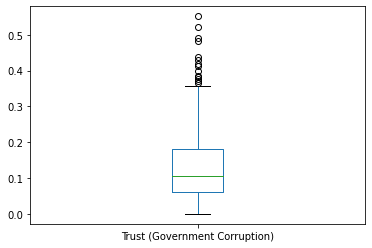

In [49]:
hs['Trust (Government Corruption)'].plot.box()

There are so many outliers in Trust

<AxesSubplot:>

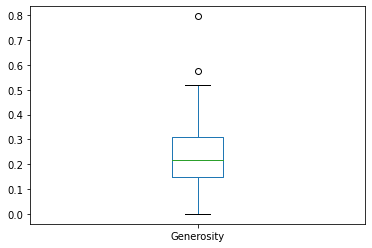

In [50]:
hs['Generosity'].plot.box()

There are few outliers in Generosity

<AxesSubplot:>

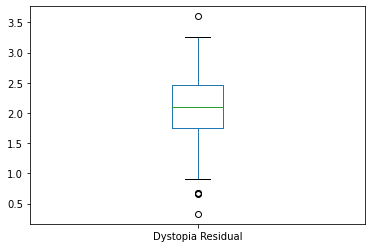

In [51]:
hs['Dystopia Residual'].plot.box()

There are few outliers in Dystopia Residual

<AxesSubplot:>

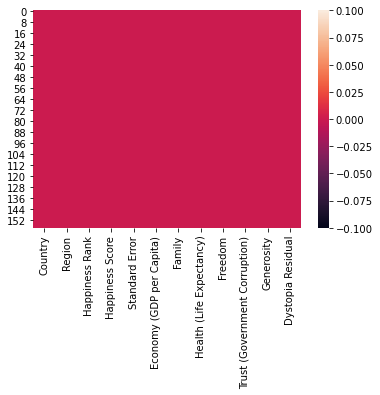

In [52]:
sn.heatmap(hs.isnull())

There's no null data

In [53]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
hs["Country"]=le.fit_transform(hs["Country"])
hs["Region"]=le.fit_transform(hs["Region"])

We have converted country and region's categorical data to numerical data

<AxesSubplot:>

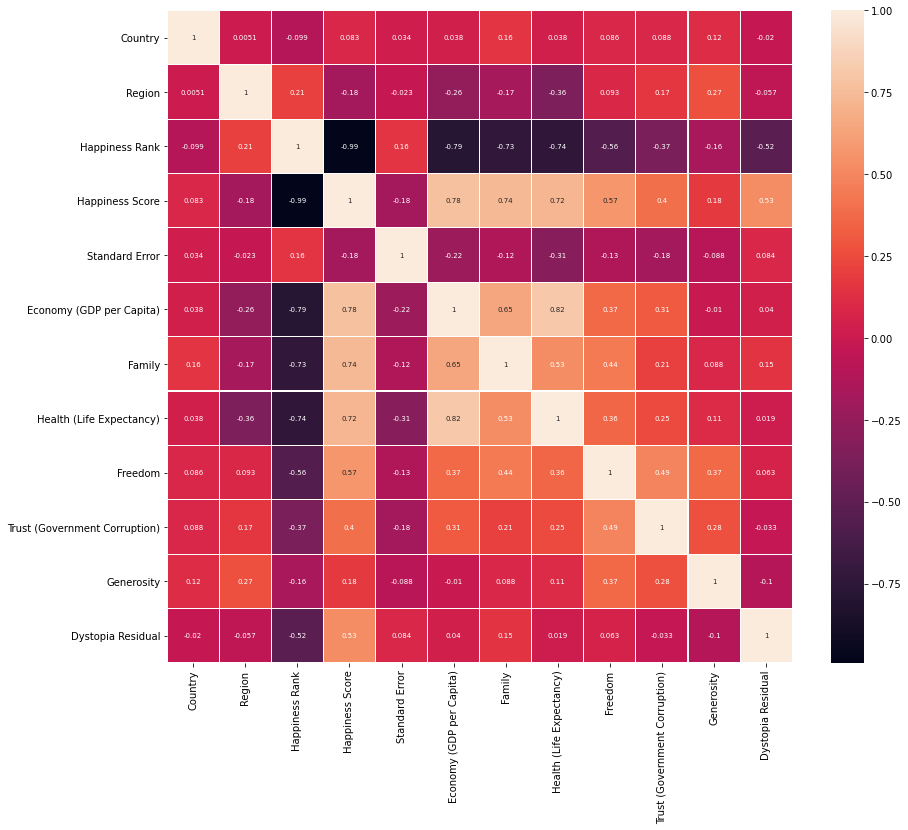

In [54]:
plt.figure(figsize=(14,12))
sn.heatmap(hs.corr(), linewidths=.1, annot=True, annot_kws={"size":7})

The Standard error is the Least Correlating data with the Happiness Score with a correlation of -0.18 .
Economy - Health and Family-Generosity are showing multicolinearity.

In [55]:
cor = hs.corr()
cor

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.260139,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,0.165040,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105


it gives us the correlation of every variable with eachother

In [56]:
pos = cor[cor>0.75]
pos

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Happiness Rank,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Happiness Score,NaN,NaN,NaN,1.000000,NaN,0.780966,NaN,NaN,NaN,NaN,NaN,NaN
Standard Error,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Economy (GDP per Capita),NaN,NaN,NaN,0.780966,NaN,1.000000,NaN,0.816478,NaN,NaN,NaN,NaN
Family,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Health (Life Expectancy),NaN,NaN,NaN,NaN,NaN,0.816478,NaN,1.000000,NaN,NaN,NaN,NaN
Freedom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Trust (Government Corruption),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


We can see that there are strong positive correlation between Score and economy , Economy and Health.

Text(0, 0.5, 'Economy')

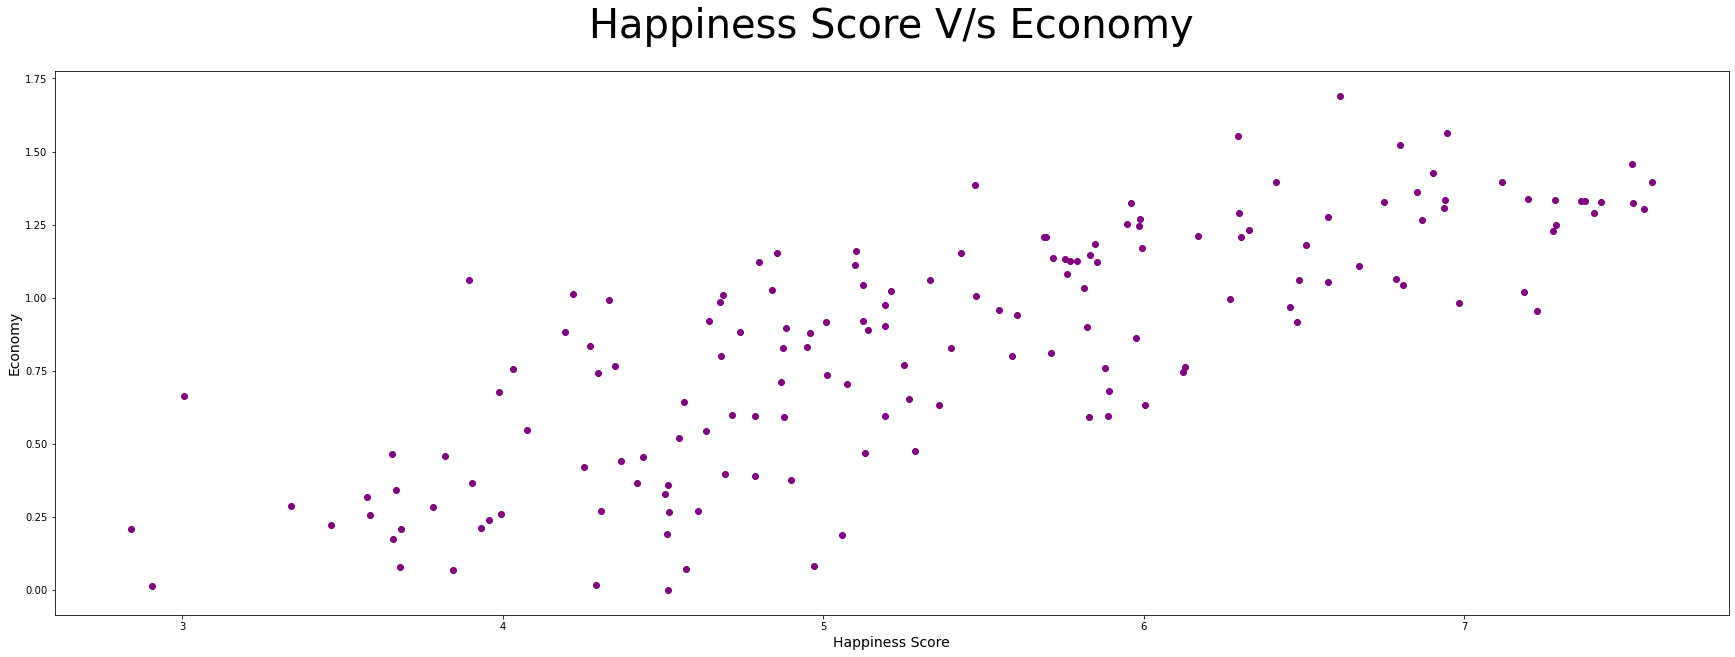

In [57]:
plt.figure(figsize=(30,10))
plt.scatter(hs['Happiness Score'], hs['Economy (GDP per Capita)'], color='purple')
plt.title('Happiness Score V/s Economy' , fontsize=40 , y =1.05)
plt.xlabel('Happiness Score', fontsize=14)
plt.ylabel("Economy", fontsize=14)

The graph shows that Higher the Economy of the Country, Much a happier place to live. Although there are exceptions, as we have seen that Qatar has maximum Economy but still its not near to being a happiest country. This may prove that the strong economy is not the answer to the happiness.

Text(0, 0.5, 'Health')

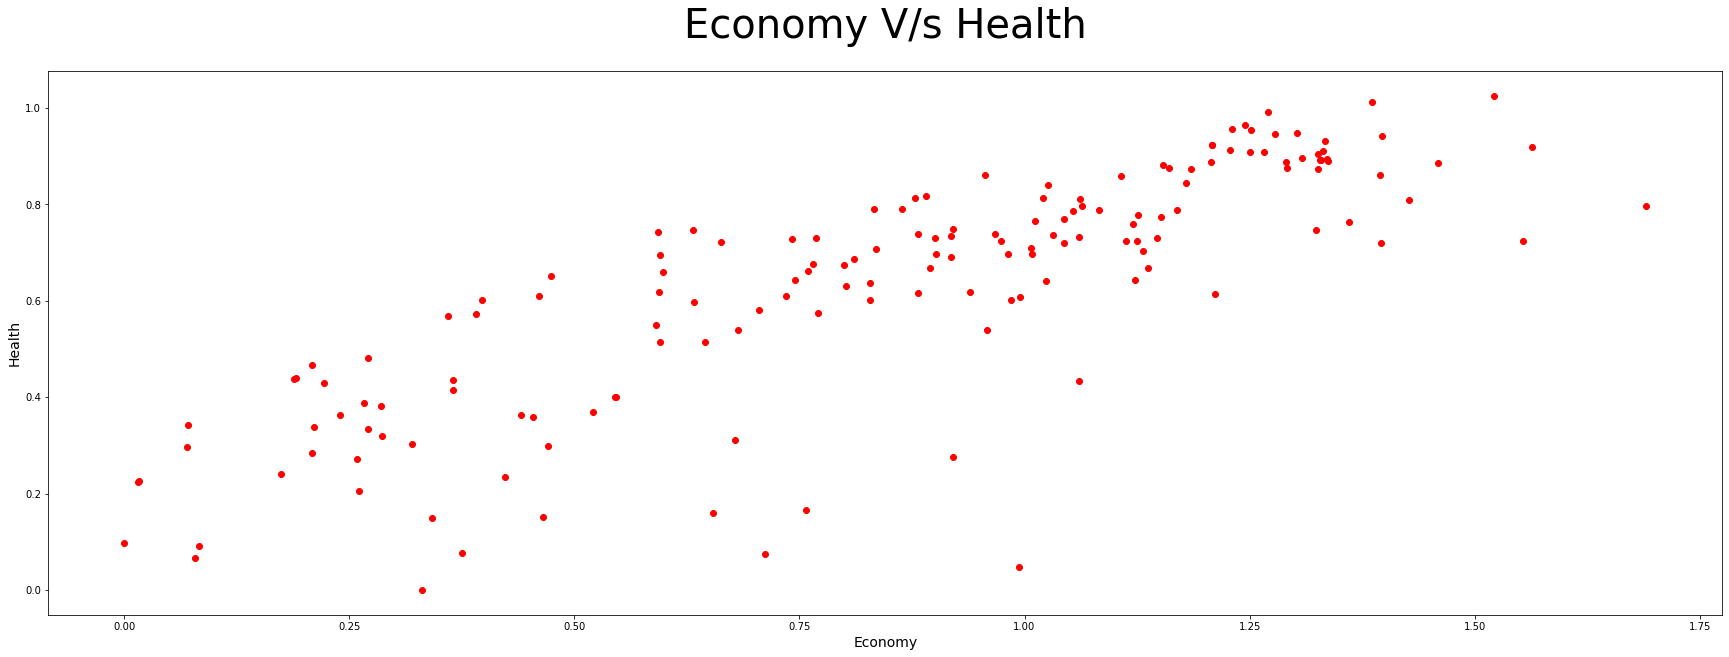

In [58]:
plt.figure(figsize=(30,10))
plt.scatter(hs['Economy (GDP per Capita)'], hs["Health (Life Expectancy)"], color='red')
plt.title('Economy V/s Health' , fontsize=40 , y =1.05)
plt.xlabel('Economy', fontsize=14)
plt.ylabel("Health", fontsize=14)

Shows that higher the Economy, higher is the life Expectancy, but after a certain stage (economy>1.25) the life expectancy remains same even if the economy increases.

# Removing Outliers

In [59]:
z=np.abs(zscore(hs))
df = hs[(z<3).all(axis=1)]
df.shape

(149, 12)

After removing the outliers there are 149 rows and 12 columns. But in actual dataset there were 158 rows and 12 columns. Hence we lost 9 rows

In [60]:
9/158

0.056962025316455694

The data loss is 5% which is in acceptable range. 

# Skewness

In [61]:
df.skew()

Country                          0.048701
Region                          -0.096985
Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

There is skewness in  Standard Error , Family, Health, Trust and Generosity.

In [62]:
df['Standard Error']=np.log(df["Standard Error"])

Treating the skewness of Standard error using log method.

In [63]:
df['Standard Error'].skew()

0.12322043132563748

After treatment , there is no skewness in standard error

In [72]:
df['Family']=np.log(df['Family'])

Treating the skewness of Family using Log method

In [73]:
df["Family"].skew()

nan

The skewness from Family has been removed successfully.

In [74]:
df['Health (Life Expectancy)']=np.log(df['Health (Life Expectancy)'])

Treating skewness of Health (Life Expectancy)

In [75]:
df['Health (Life Expectancy)'].skew()

nan

The skewness has been treated successfully.

In [76]:
df['Trust (Government Corruption)']=np.log(df['Trust (Government Corruption)'])

Treating skewness of Trust (Government Corruption)

In [77]:
df['Trust (Government Corruption)'].skew()

nan

The skewness of Trust (Government Corruption) has been removed

In [78]:
df['Generosity']=np.log(df['Generosity'])

Treating skewness of Generosity

In [79]:
df['Generosity'].skew()

nan

The skewness has been removed

In [83]:
x= df.drop("Happiness Score", axis=1)
y= df['Happiness Score']

Separating the columns into target(y) and features (x)

In [84]:
from sklearn.preprocessing import MinMaxScaler
mns = MinMaxScaler()
lr = LinearRegression()
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

Importing the libraries

In [85]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=45)
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print(r2_score(y_test,pred_test))

0.9999999377888897


The r2 score of Linear Regression is 99.99%

In [87]:
lr.predict(y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[4.874 7.587 3.678 4.218 5.194 7.522 4.077 4.571 5.102 6.411 4.55  3.819
 7.278 4.297 5.474 4.369 5.429 3.656 3.956 5.759 3.655 6.295 4.252 4.61
 5.995 5.192 4.332 5.709 3.995 7.427 6.329 6.575 6.168 5.073 4.885 3.989
 4.686 6.75  5.36  7.187 6.67  5.124 6.505 6.455 5.689 6.003 7.561 4.867
 3.904 6.853 5.754 4.436 3.587].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.